In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import rasterio
import plotly.graph_objects as go
from plotly import offline

offline.init_notebook_mode(connected=True)

In [2]:
raster = rasterio.open('../data/geodata/landcover.tif').read(1, masked=True)
files = ['august.csv', 'september.csv', 'october.csv'] 
PATH ='../data/private/csv/mat/'

df = [pd.read_csv(os.path.join(PATH, file)) 
      for file in files]
df = pd.concat(df, sort=False)

query = '(month == 8 and day >= 27) or (month == 9) or (month == 10 and day <= 7)'
df = df.query(query)
df.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
1201483,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7089,190.0,98.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473
1201484,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7089,191.0,98.0,21.1250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9364,0.1666
1201485,2014.0,8.0,27.0,2.0,24.0,1.0,-58.6114,-2.7289,189.0,99.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473
1201486,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7289,190.0,99.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.2011
1201487,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7289,191.0,99.0,20.9375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9098,0.1874


In [3]:
df.count()

year           2515607
month          2515607
day            2515607
hour           2515607
minute         2515607
n_cluster      2515607
lon            2515607
lat            2515607
ind_x          2515607
ind_y          2515607
reflect        2515607
yyyyy_xx1      2515607
yyyyy_xx2      2515607
yyyyyyy_xx3    2515607
yyy_xx4        2515607
yyy_xx5        2515607
river          2515607
cxe            2515607
precipit       2515607
vil            2515607
dtype: int64

In [4]:
ind_x = df['ind_x'].astype('int16').values
ind_y = df['ind_y'].astype('int16').values

landcover = []

for x, y in zip(ind_x, ind_y):
    landcover.append(raster[x][y])

In [5]:
df['landcover'] = landcover
df.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,...,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil,landcover
1201483,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7089,190.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473,3.0
1201484,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7089,191.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9364,0.1666,3.0
1201485,2014.0,8.0,27.0,2.0,24.0,1.0,-58.6114,-2.7289,189.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473,3.0
1201486,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7289,190.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.2011,3.0
1201487,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7289,191.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9098,0.1874,3.0


In [6]:
groupByLandcover = df.groupby(['landcover']).agg({'yyyyyyy_xx3': 'sum'})
groupByLandcover.head()

,yyyyyyy_xx3
landcover,
1.0,105.0
2.0,90.0
3.0,69435.0
4.0,200.0
5.0,713.0


In [7]:
classes = {
    1: 'AGRICULTURA_ANUAL', 2: 'AREA_NAO_OBSERVADA',
    3: 'FLORESTA', 4: 'MOSAICO_DE_OCUPACOES',
    5: 'PASTO_LIMPO', 6: 'PASTO_SUJO',
    7: 'AREA_URBANA', 8: 'VEGETACAO_SECUNDARIA',
    9: 'REGENERACAO_COM_PASTO', 10: 'OUTROS',
    11: 'HIDROGRAFIA', 12: 'MINERACAO',
    13: 'REFLORESTAMENTO', 14: 'DESFLORESTAMENTO_2014',
    15: 'NAO_FLORESTA', 16: 'PASTO_COM_SOLO_EXPOSTO'
}

values = list(groupByLandcover['yyyyyyy_xx3'].values.astype('int32'))
labels = list(groupByLandcover.index.astype('int16'))
labels = [classes[label] for label in labels]
colors = (
    '#dcf064', '#404040', '#006400', '#b0cc67', '#fff5d7', '#563c10', 
    '#af2a2a', '#6ebaf0', '#d0377c', '#ff7b00', '#0046c8', '#f3fd28', '#87CBAC'
)

In [12]:
fig = go.Figure()

text=['%.2f%%'%(float(x)) for x in values]

for label, value, color in zip(labels, values, colors):
#     if label == 'FLORESTA':
#         continue
    fig.add_trace(
        go.Table(x=[value], y=[label], 
                marker=dict(color=color),
                name=label, orientation='h', 
                text=str(value),
                textposition='auto')
    )

fig.update_layout(
    showlegend=True,
    template='plotly_dark',
    title='Quantidade de raios detectados em cada tipo de cobertura do solo'
)
# offline.plot(fig, image_filename='amount-lightning-by-landcover-without-forest', 
#              image_width=1000, image_height=600, image='png')
offline.iplot(fig)

In [9]:


Existem dois conjuntos de dados, daqui pra frente chamado de **Mat** e **Fam**. No conjunto de dados do tipo Mat, os registros são associados a um índice de matriz com dimensão de 241x241 a cada 12 minutos. Já no conjunto de dados do tipo Fam, as nuvens detectadas pelo radar são agrupadasgroupCount = df.groupby(['landcover']).agg({'yyyyyyy_xx3': 'count'})
groupCount.head()

SyntaxError: invalid syntax (<ipython-input-9-10e2b4868673>, line 3)

In [10]:
fig = go.Figure()

text=['%.2f%%'%(float(x)) for x in values]

for label, value, color in zip(labels, values, colors):
    if label == 'FLORESTA':
        continue
    fig.add_trace(
        go.Bar(x=[value], y=[label], 
                marker=dict(color=color),
                name=label, orientation='h', 
                text=str(value),
                textposition='auto')
    )

fig.update_layout(
    showlegend=True,
    template='plotly_dark',
    title='Quantidade de registros com detecções de raios em cada tipo de cobertura do solo'
)
offline.plot(fig, image_filename='amount-records-with-lightning-detection-by-landcover-without-forest', 
             image_width=1000, image_height=600, image='png')
offline.iplot(fig)

In [10]:
groupp = df.groupby(['lon', 'lat']).agg({'vil': 'sum'})
groupl = df.groupby(['lon', 'lat']).agg({'yyyyyyy_xx3': 'sum'})

x1, y1, z1 = [], [], []
for i, row in groupp.iterrows():
    x1.append(i[0])
    y1.append(i[1])
    z1.append(row['vil'])
    
x2, y2, z2 = [], [], []
for i, row in groupl.iterrows():
    x2.append(i[0])
    y2.append(i[1])
    z2.append(row['yyyyyyy_xx3'])

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



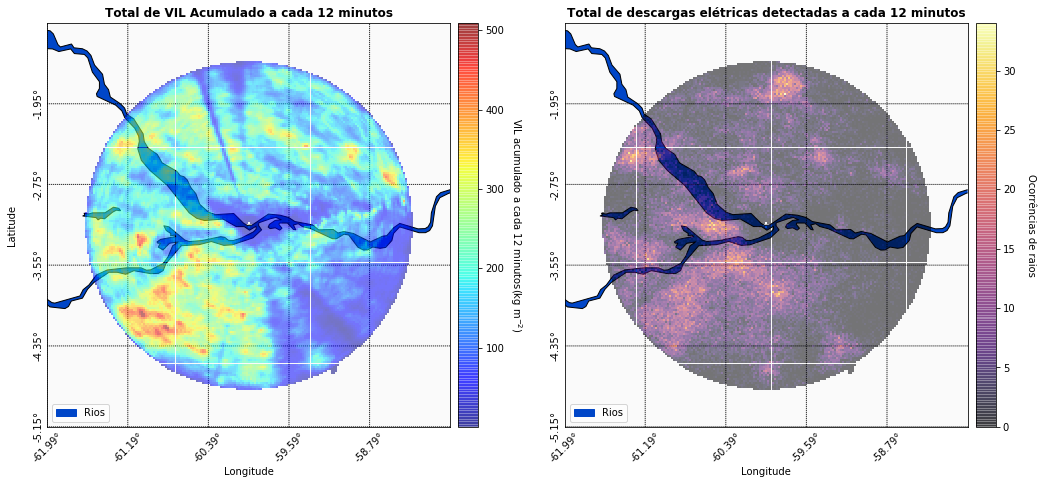

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
alphap, sizep = .5, 1
alphal, sizel = .5, 1
n, s, w, e = -0.991217, -5.30485, -62.1561, -57.8267
m, c = (n-s)/2, (w-e)/2
latm, lonm = n-m, w-c
my_coords = [float('%.2f'%latm), float('%.2f'%lonm)]
zoom_scale = 2
font = {'fontweight': 'semibold'}

bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]
map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',  ax=ax[0])
map.drawcoastlines()
map.fillcontinents(color='#fafafa',lake_color='#0046C8')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5), \
                  labels=[1,0,0,0], labelstyle='+/-', rotation=-270)
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5), \
                  labels=[0,0,0,1], labelstyle='+/-', rotation=45)

xx, yy = map(x1, y1)
cm = ax[0].scatter(xx, yy, sizep, c=z1, marker='s', cmap='jet', alpha=alphap, zorder=99)
cm = map.colorbar(cm)
cm.ax.set_ylabel('VIL acumulado a cada 12 minutos(kg m$^{-2}$)', labelpad=20, rotation=-90)

map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',  ax=ax[1])
map.drawcoastlines()
map.fillcontinents(color='#fafafa',lake_color='#0046C8')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5), \
                  labels=[1,0,0,0], labelstyle='+/-', rotation=-270)
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5), \
                  labels=[0,0,0,1], labelstyle='+/-', rotation=45)
xx, yy = map(x2, y2)


cm = ax[1].scatter(xx, yy, sizep, c=z2, marker='s', cmap='inferno', alpha=alphap, zorder=99)
cm = map.colorbar(cm)
cm.ax.set_ylabel('Ocorrências de raios', labelpad=20, rotation=-90)

ax[0].set_title('Total de VIL Acumulado a cada 12 minutos', fontdict=font)
ax[1].set_title('Total de descargas elétricas detectadas a cada 12 minutos', fontdict=font)
ax[0].set_xlabel('Longitude', labelpad=40)
ax[1].set_xlabel('Longitude', labelpad=40)
ax[0].set_ylabel('Latitude', labelpad=30)
# ax[1].set_ylabel('Latitude', labelpad=30)

lpatch = mpatches.Patch(color='red', label='Descargas elétricas')
rpatch = mpatches.Patch(color='#0046C8', label='Rios')
ax[0].legend(handles=[rpatch])
ax[1].legend(handles=[rpatch])

plt.savefig('../results/distribution_indexes.png', dpi=600, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()